In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import roc_auc_score, f1_score, mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Read Data

In [54]:
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

In [55]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Profiling

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [57]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


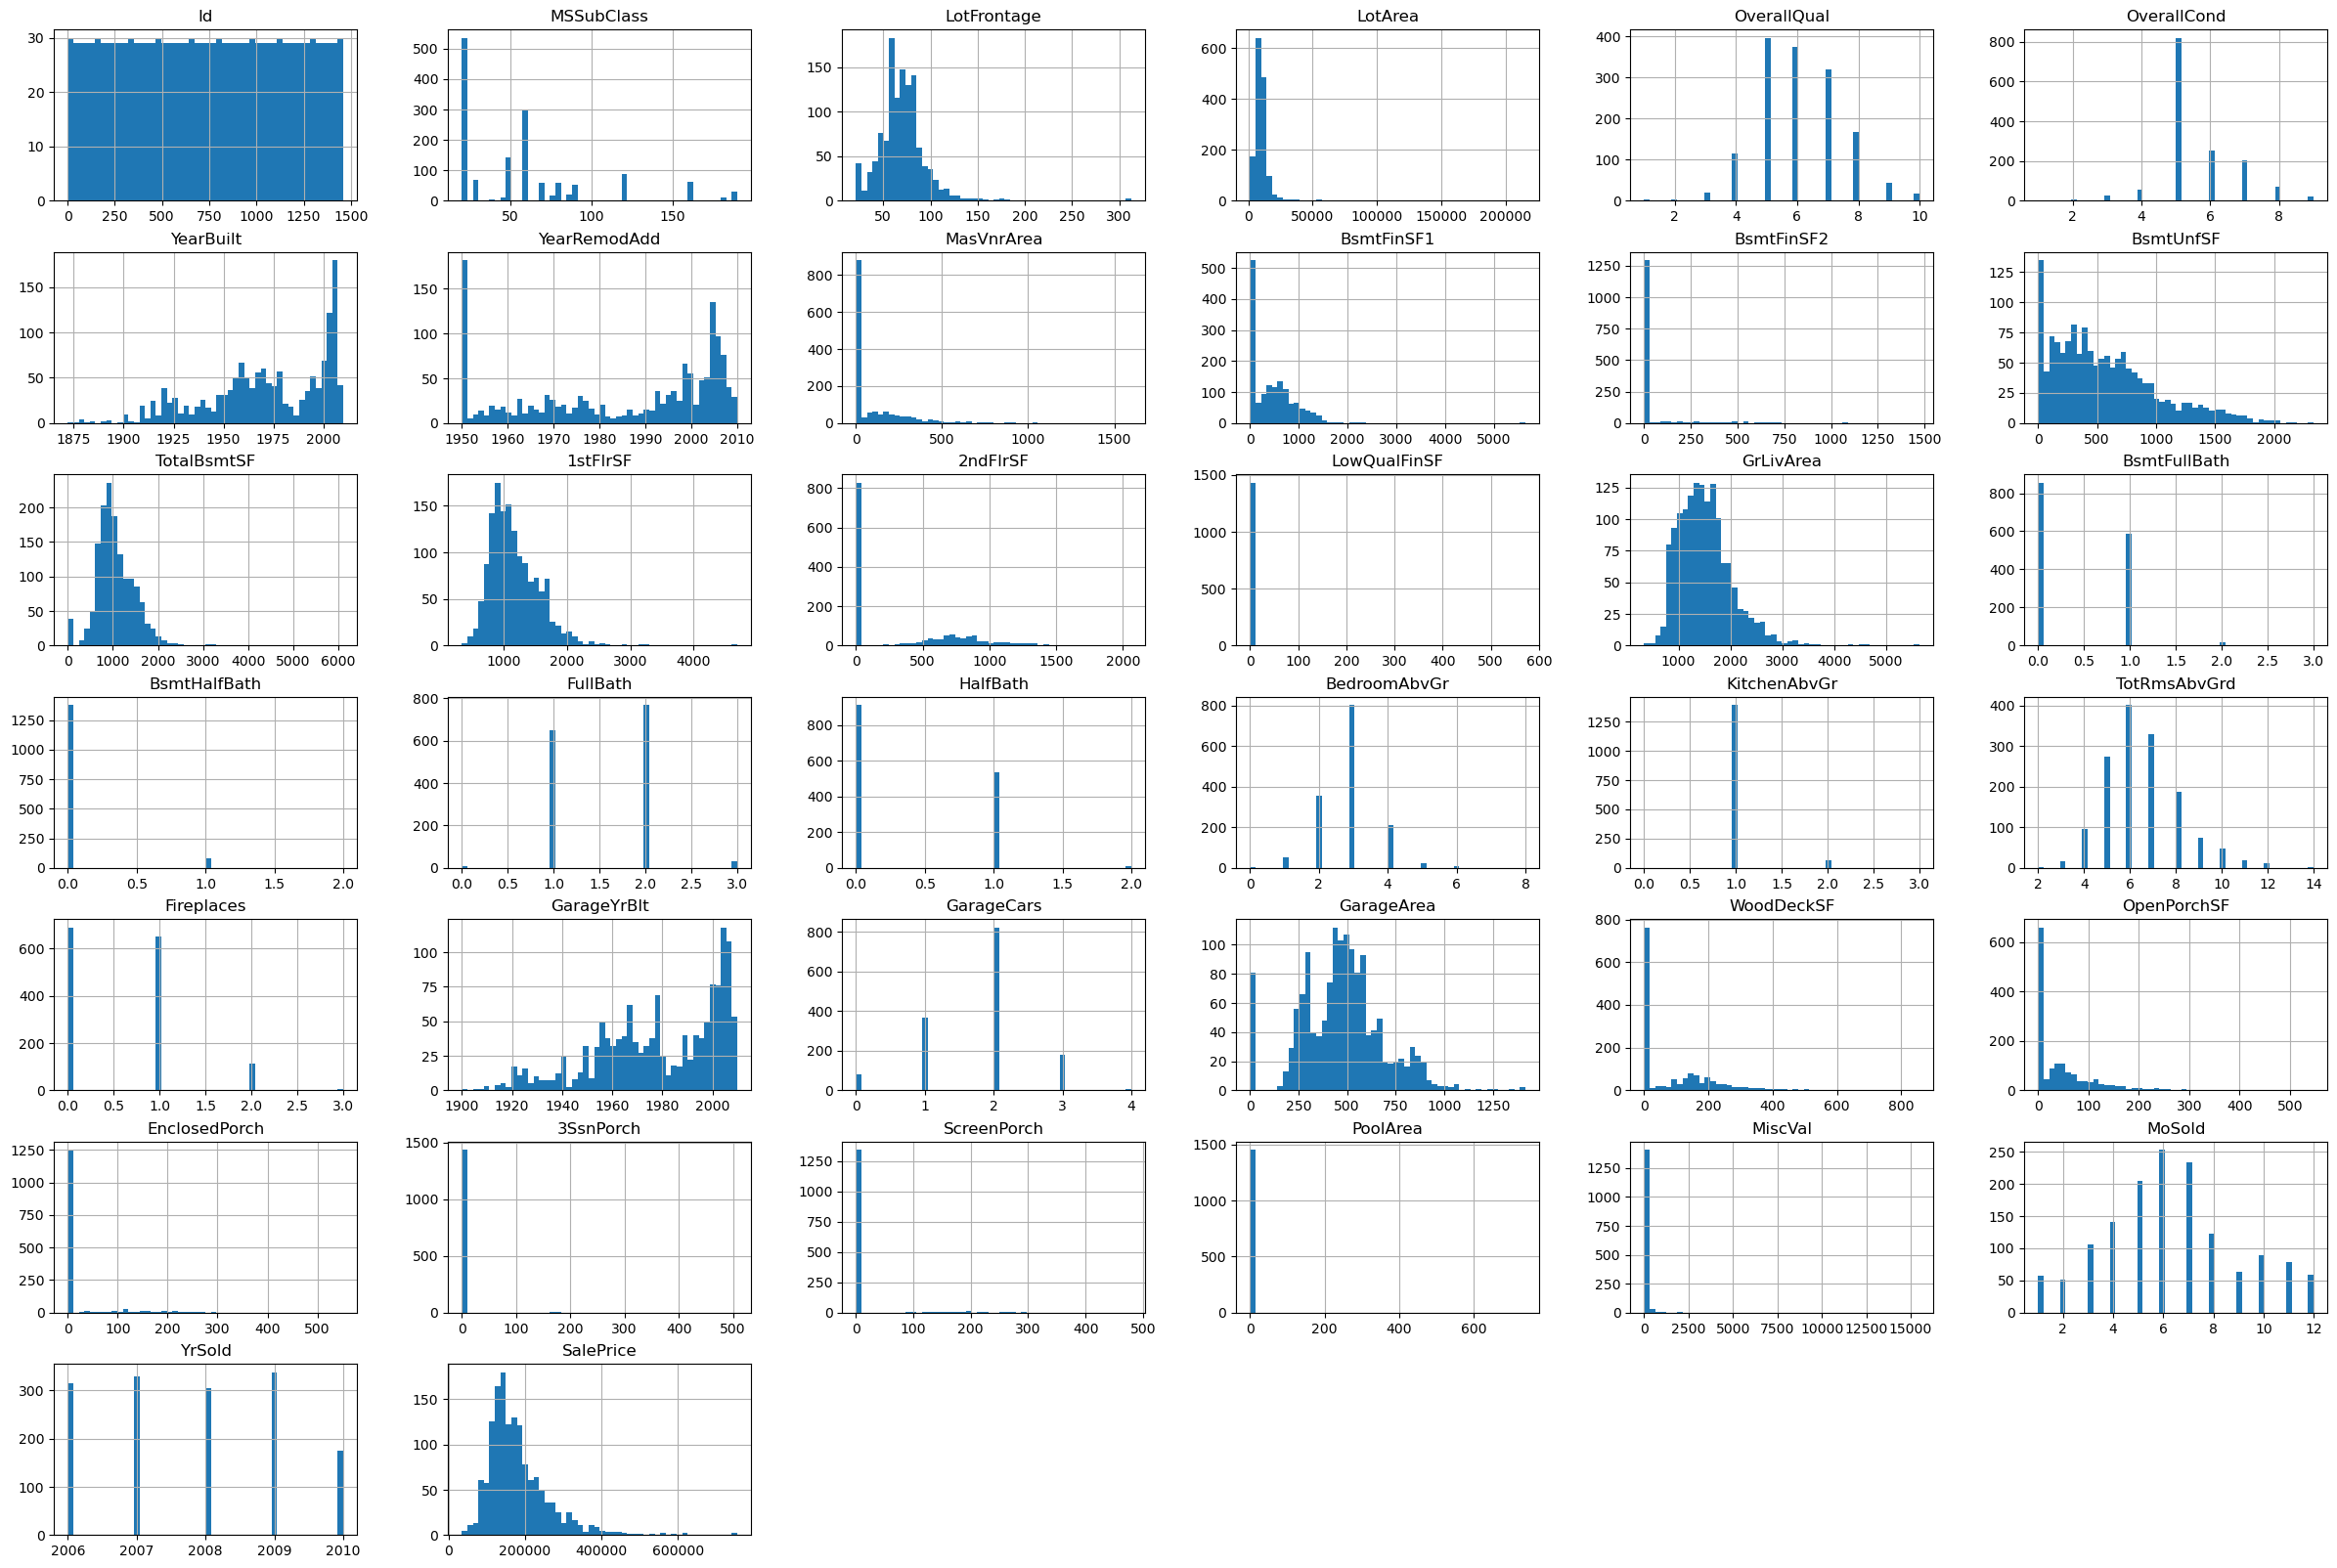

In [58]:
df_train.hist(bins=50, figsize=(30,20))
plt.show()

In [59]:
df_train['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

<Axes: >

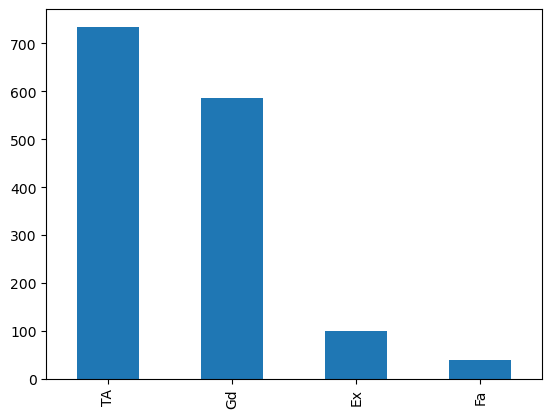

In [60]:
df_train['KitchenQual'].value_counts().plot.bar()

<Axes: >

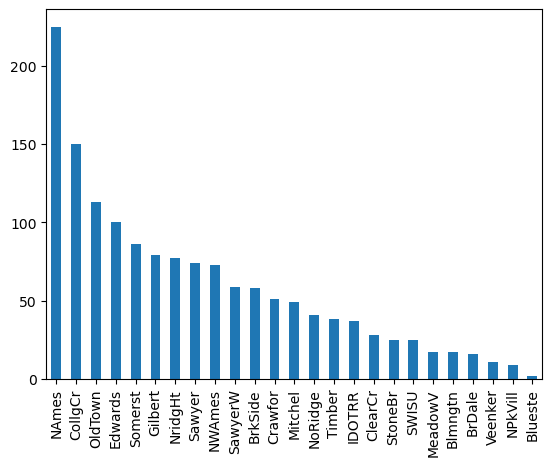

In [61]:
df_train['Neighborhood'].value_counts().plot.bar()

In [62]:
df_train.select_dtypes(include="number").corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [63]:
df_train.select_dtypes(include="number").corr()['OverallQual']

Id              -0.028365
MSSubClass       0.032628
LotFrontage      0.251646
LotArea          0.105806
OverallQual      1.000000
OverallCond     -0.091932
YearBuilt        0.572323
YearRemodAdd     0.550684
MasVnrArea       0.411876
BsmtFinSF1       0.239666
BsmtFinSF2      -0.059119
BsmtUnfSF        0.308159
TotalBsmtSF      0.537808
1stFlrSF         0.476224
2ndFlrSF         0.295493
LowQualFinSF    -0.030429
GrLivArea        0.593007
BsmtFullBath     0.111098
BsmtHalfBath    -0.040150
FullBath         0.550600
HalfBath         0.273458
BedroomAbvGr     0.101676
KitchenAbvGr    -0.183882
TotRmsAbvGrd     0.427452
Fireplaces       0.396765
GarageYrBlt      0.547766
GarageCars       0.600671
GarageArea       0.562022
WoodDeckSF       0.238923
OpenPorchSF      0.308819
EnclosedPorch   -0.113937
3SsnPorch        0.030371
ScreenPorch      0.064886
PoolArea         0.065166
MiscVal         -0.031406
MoSold           0.070815
YrSold          -0.027347
SalePrice        0.790982
Name: Overal

In [216]:
df_train_cleansed.corr()['SalePrice']

/var/folders/ll/01gdbc2n2d1f47wbbx616f4r0000gn/T/ipykernel_69073/3804422222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_cleansed.corr()['SalePrice']


MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
HeatingQC        0.427649
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
KitchenQual      0.659600
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
GarageQual       0.156693
GarageCond       0.125013
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
Fence            0.201953
MiscVal         -0.021190
MoSold           0.046432
YrSold      

# Feature Engineers

## remove the following columns
Based on the observation, marjoriy of rows are null value in the following columns:<br>
Alley<br>
PoolQC<br>
MiscFeature<br>

In [266]:
def drop_columns(df:pd.DataFrame, columns: list):

    df = df.drop(columns, axis=1)

    return df

def set_ID_2_index(df: pd.DataFrame, id_column:str):

    df = df.set_index(id_column)
    return df

def map_column_2_num(df: pd.DataFrame, column:str, mapping: dict):

    df[column] = df[column].map(mapping)
    return df

def agg_columns(df: pd.DataFrame, columns: list, new_column:str, drop_columns:bool=False):
    df[new_column] = df[columns].sum(axis=1)
    if drop_columns:
       df.drop(columns=columns, inplace=True)
    else: pass 

    return df 

def convert_to_str(df:pd.DataFrame, columns:list):
    df[columns] = df[columns].astype('str')

    return df

def agg_bathroom(df:pd.DataFrame):
    df["n_bathrooms"] = df["BsmtFullBath"] + (df["BsmtHalfBath"]*0.5) + df["FullBath"] + (df["HalfBath"]*0.5)
    df.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True)
    return df

In [66]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [290]:
columns_to_be_dropped = ["Alley", "PoolQC", "MiscFeature", "Condition2", "PoolArea", "3SsnPorch"]

df_train_cleansed = (df_train
                        .pipe(drop_columns, columns=columns_to_be_dropped)
                        .pipe(set_ID_2_index, id_column='Id')
                        .pipe(map_column_2_num, column='KitchenQual', mapping={
                                                                                'Ex': 4,
                                                                                'Gd': 3,
                                                                                'TA': 2,
                                                                                'Fa': 1,
                                                                                'Po': 0
                                                                            })
                        .pipe(map_column_2_num, column='GarageQual', mapping={
                                                                                'Ex': 5,
                                                                                'Gd': 4,
                                                                                'TA': 3,
                                                                                'Fa': 2,
                                                                                'Po': 1,
                                                                                'NA': 0
                                                                            })
                        .pipe(map_column_2_num, column='GarageCond', mapping={
                                                                                'Ex': 5,
                                                                                'Gd': 4,
                                                                                'TA': 3,
                                                                                'Fa': 2,
                                                                                'Po': 1,
                                                                                'NA': 0
                                                                            }) 
                        .pipe(map_column_2_num, column='Fence', mapping={
                                                                                'GdPrv': 4,
                                                                                'MnPrv': 3,
                                                                                'GdWo': 2,
                                                                                'MnWw': 1,
                                                                                'NA': 0
                                                                            })    
                        .pipe(map_column_2_num, column='HeatingQC', mapping={
                                                                                'Ex': 4,
                                                                                'Gd': 3,
                                                                                'TA': 2,
                                                                                'Fa': 1,
                                                                                'Po': 0
                                                                            }) 
                        .pipe(agg_columns, columns=['1stFlrSF', '2ndFlrSF'], new_column= 'totalFlrSF', drop_columns=True) 
                        .pipe(convert_to_str, columns='MSSubClass')  
                        .pipe(agg_bathroom)                                                     
)
df_test_cleansed = (df_test
                        .pipe(drop_columns, columns=columns_to_be_dropped)
                        .pipe(set_ID_2_index, id_column='Id')
                        .pipe(map_column_2_num, column='KitchenQual', mapping={
                                                                                'Ex': 4,
                                                                                'Gd': 3,
                                                                                'TA': 2,
                                                                                'Fa': 1,
                                                                                'Po': 0
                                                                            })
                        .pipe(map_column_2_num, column='GarageQual', mapping={
                                                                                'Ex': 5,
                                                                                'Gd': 4,
                                                                                'TA': 3,
                                                                                'Fa': 2,
                                                                                'Po': 1,
                                                                                'NA': 0
                                                                            })
                        .pipe(map_column_2_num, column='GarageCond', mapping={
                                                                                'Ex': 5,
                                                                                'Gd': 4,
                                                                                'TA': 3,
                                                                                'Fa': 2,
                                                                                'Po': 1,
                                                                                'NA': 0
                                                                            }) 
                        .pipe(map_column_2_num, column='Fence', mapping={
                                                                                'GdPrv': 4,
                                                                                'MnPrv': 3,
                                                                                'GdWo': 2,
                                                                                'MnWw': 1,
                                                                                'NA': 0
                                                                            })  
                        .pipe(map_column_2_num, column='HeatingQC', mapping={
                                                                                'Ex': 4,
                                                                                'Gd': 3,
                                                                                'TA': 2,
                                                                                'Fa': 1,
                                                                                'Po': 0
                                                                            })     
                        .pipe(agg_columns, columns=['1stFlrSF', '2ndFlrSF'], new_column= 'totalFlrSF', drop_columns=True)   
                        .pipe(convert_to_str, columns='MSSubClass')   
                        .pipe(agg_bathroom)                       

)

In [68]:
df_train_cleansed['Neighborhood']

Id
1       CollgCr
2       Veenker
3       CollgCr
4       Crawfor
5       NoRidge
6       Mitchel
7       Somerst
8        NWAmes
9       OldTown
10      BrkSide
11       Sawyer
12      NridgHt
13       Sawyer
14      CollgCr
15        NAmes
16      BrkSide
17        NAmes
18       Sawyer
19      SawyerW
20        NAmes
21      NridgHt
22       IDOTRR
23      CollgCr
24      MeadowV
25       Sawyer
26      NridgHt
27        NAmes
28      NridgHt
29        NAmes
30      BrkSide
31       IDOTRR
32       Sawyer
33      CollgCr
34        NAmes
35      NridgHt
36      NridgHt
37      CollgCr
38        NAmes
39        NAmes
40      Edwards
41        NAmes
42       Timber
43      SawyerW
44      CollgCr
45        NAmes
46      NridgHt
47      Mitchel
48      Somerst
49      OldTown
50       Sawyer
51      Gilbert
52      BrkSide
53       IDOTRR
54      Veenker
55        NAmes
56        NAmes
57      Somerst
58      CollgCr
59      StoneBr
60      CollgCr
61      SawyerW
62       IDOTRR
63   

# Split data into X and y

In [268]:
def split_data_2_x_y(df:pd.DataFrame, target_column:str=None):

    columns = df.columns 
    X_columns = [i for i in columns if i != target_column]
    y_column = target_column if target_column in columns else None 

    if y_column:
        return df[X_columns], df[y_column]
    else:
        return df[X_columns], None

In [269]:
X, y = split_data_2_x_y(df_train_cleansed, target_column='SalePrice')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [291]:
X_test, _ = split_data_2_x_y(df_test_cleansed)

In [194]:
df_test_cleansed.shape

(1459, 74)

In [195]:
X_test.shape

(1459, 74)

# Data Pipeline

In [270]:
num_pipeline = Pipeline([
    ("Fill N/A value", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

cate_pipeline = Pipeline([
    ("Fill N/A value", SimpleImputer(strategy="most_frequent")),
    ("One Hot Encoder", OneHotEncoder(handle_unknown="ignore"))
])


num_attribs = X_train.select_dtypes(include="number").columns
cat_attribs = X_train.select_dtypes(include="object").columns

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cate_pipeline, cat_attribs)
])

# Train model

## Random Forest

In [271]:
#  Randome Forest Tree
rnd_rg = Pipeline(
    [
    ("preprocessing", preprocessing), 
    ("RandomForestRegressor", RandomForestRegressor(random_state=42))
    ])
rnd_rg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Fill N/A '
                                                                   'value',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'LowQualFinS...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object'))])),
                ('RandomForestRegressor',
                 RandomForestRegressor(random_state=42))])

In [273]:
# randome forest tree
y_pred = rnd_rg.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

# mean_absolute_error = mean_absolute_error(y_val, y_pred)

# Print the MSE score
print('MSE score:', mse)
print('R2 score:', r2)
print('mse score:', mean_absolute_error)
print("RMSE:", rmse)

# MSE score: 998070101.3008945
# R2 score: 0.8907617983440265
# mse score: 18826.67163013699
# RMSE: 31592.24748733294

MSE score: 1078127811.349908
R2 score: 0.8819995277750046
mse score: 18826.67163013699
RMSE: 32834.85665188609


## XGboost

In [274]:
# xgboost
xg_rg = make_pipeline(preprocessing, XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=200, gamma=0.2))
xg_rg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Fill N/A '
                                                                   'value',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'LowQual...
                              feature_types=None, gamma=0.2, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [275]:
# xgboost regression
y_pred = xg_rg.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
# mean_absolute_error = mean_absolute_error(y_val, y_pred)

# Print the MSE score
print('MSE score:', mse)
print('R2 score:', r2)
print('mse score:', mean_absolute_error)
print("RMSE:", rmse)

# MSE score: 1097104600.3802278
# R2 score: 0.8799225290710307
# mse score: 18826.67163013699
# RMSE: 33122.569350523336

MSE score: 1055041261.4800265
R2 score: 0.8845263374519398
mse score: 18826.67163013699
RMSE: 32481.398699563822


## SVC

In [276]:
svr = make_pipeline(preprocessing, SVR(kernel = 'rbf', degree=3))
svr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Fill N/A '
                                                                   'value',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'LowQual...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object'))])),
                ('svr', SVR())])

In [277]:
# svr
y_pred = svr.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
# mean_absolute_error = mean_absolute_error(y_val, y_pred)

# Print the MSE score
print('MSE score:', mse)
print('R2 score:', r2)
print('mse score:', mean_absolute_error)
print("RMSE:", rmse)

# MSE score: 943167033.9983362
# R2 score: 0.8967709076537945
# mse score: 16672.247465753426
# RMSE: 30711.024632830737

MSE score: 9464906878.260206
R2 score: -0.03592864356397962
mse score: 18826.67163013699
RMSE: 97287.75297158532


# Tuning Models

In [278]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = [
    {
    'random_forest__max_features': [6, 8, 10],
    'random_forest__n_estimators': [50, 100, 200, 500],
    'random_forest__max_depth': [5, 10, None],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4],
    }
]
grid_search_rnd_rg = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring="r2", #"roc_auc", 
                           n_jobs=-1)
grid_search_rnd_rg.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('Fill '
                                                                                          'N/A '
                                                                                          'value',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBs...
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object'))])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'random_forest__max_depth': [5, 10, None],
                          'random_forest__max_features': [6, 8, 10],
                          'random_forest__min_samples_leaf': [1, 2, 4],
                          'random_forest__min_samples_split': [2, 5, 10],
                          'random_forest__n_estimators': [50, 100, 200, 500]}],
             scoring='r2')

In [279]:
print('Best hyperparameters:', grid_search_rnd_rg.best_params_)
print('Best score:', grid_search_rnd_rg.best_score_)

Best hyperparameters: {'random_forest__max_depth': None, 'random_forest__max_features': 10, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 200}
Best score: 0.8350656655994592


In [280]:
cv_res = pd.DataFrame(grid_search_rnd_rg.cv_results_)
cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__min_samples_split,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
290,0.501125,0.019895,0.019579,0.001005,None,10,1,2,200,"{'random_forest__max_depth': None, 'random_forest__max_features': 10, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 200}",0.847983,0.795819,0.861395,0.835066,0.028287,1
291,1.223083,0.022576,0.049653,0.009960,None,10,1,2,500,"{'random_forest__max_depth': None, 'random_forest__max_features': 10, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 500}",0.846398,0.795319,0.861312,0.834343,0.028258,2
289,0.275725,0.015824,0.012042,0.000322,None,10,1,2,100,"{'random_forest__max_depth': None, 'random_forest__max_features': 10, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 100}",0.842682,0.801440,0.856721,0.833615,0.023462,3
294,0.362015,0.015451,0.017090,0.000214,None,10,1,5,200,"{'random_forest__max_depth': None, 'random_forest__max_features': 10, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 5, 'random_forest__n_estimators': 200}",0.842410,0.796210,0.859398,0.832673,0.026699,4
295,0.803493,0.032496,0.038366,0.005129,None,10,1,5,500,"{'random_forest__max_depth': None, 'random_forest__max_features': 10, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 5, 'random_forest__n_estimators': 500}",0.840435,0.792601,0.859712,0.830916,0.028213,5


In [281]:
grid_search_model = grid_search_rnd_rg.best_estimator_
# feature_importances = grid_search_model
feature_importances = grid_search_model["random_forest"].feature_importances_
feature_importances.round(4)

sorted(zip(feature_importances, grid_search_model["preprocessing"].get_feature_names_out()), reverse=True)[-30:]

[(2.9377509084088975e-05, 'cat__Street_Pave'),
 (2.7130140045682773e-05, 'cat__RoofMatl_WdShake'),
 (2.63927133124266e-05, 'cat__MSSubClass_40'),
 (2.5840867595961582e-05, 'cat__GarageType_2Types'),
 (2.5790768247173473e-05, 'cat__RoofStyle_Mansard'),
 (2.4342236295641245e-05, 'cat__SaleType_Con'),
 (2.2428320727745536e-05, 'cat__Heating_Wall'),
 (1.98102514758724e-05, 'cat__BsmtCond_Po'),
 (1.907928062317899e-05, 'cat__MSSubClass_45'),
 (1.864281623908117e-05, 'cat__LotConfig_FR3'),
 (1.8202348937792973e-05, 'cat__SaleCondition_AdjLand'),
 (1.7645966038541887e-05, 'cat__Heating_OthW'),
 (1.696636089899962e-05, 'cat__SaleType_ConLI'),
 (1.6121359806161743e-05, 'cat__Exterior1st_AsphShn'),
 (1.589660364971596e-05, 'cat__Exterior2nd_AsphShn'),
 (1.4941271686493898e-05, 'cat__SaleType_ConLw'),
 (1.3812356555704135e-05, 'cat__RoofMatl_Metal'),
 (1.164127552442417e-05, 'cat__Neighborhood_Blueste'),
 (1.154620367377337e-05, 'cat__Exterior1st_Stone'),
 (1.0389011130178608e-05, 'cat__Functiona

In [283]:
# randome forest tree (gridsearch cv)
y_pred = grid_search_rnd_rg.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
# mean_absolute_error = mean_absolute_error(y_val, y_pred)

# Print the MSE score
print('MSE score:', mse)
print('R2 score:', r2)
print('mse score:', mean_absolute_error)
print("RMSE:", rmse)

# MSE score: 943167033.9983362
# R2 score: 0.8967709076537945
# mse score: 16672.247465753426
# RMSE: 30711.024632830737

MSE score: 1496852553.6621947
R2 score: 0.8361703442542917
mse score: 18826.67163013699
RMSE: 38689.17876696525


In [284]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("xg", XGBRegressor())
])

param_grid = [
    {
    'xg__learning_rate': [0.008, 0.01, 0.1],
    'xg__max_depth': [3, 4, 5],
    'xg__n_estimators': [500,700, 1000],
    'xg__gamma': [0.005, 0.01, 0.05]
    }
]
grid_search_xg = GridSearchCV(full_pipeline, param_grid, cv=5,
                           scoring="r2", #"roc_auc", 
                           n_jobs=-1)
grid_search_xg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('Fill '
                                                                                          'N/A '
                                                                                          'value',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBs...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid=[{'xg__gamma': [0.005, 0.01, 0.05],
                          'xg__learning_rate': [0.008, 0.01, 0.1],
                          'xg__max_depth': [3, 4, 5],
                          'xg__n_estimators': [500, 700, 1000]}],
             scoring='r2')

In [285]:
print('Best hyperparameters:', grid_search_xg.best_params_)
print('Best score:', grid_search_xg.best_score_)


Best hyperparameters: {'xg__gamma': 0.005, 'xg__learning_rate': 0.1, 'xg__max_depth': 3, 'xg__n_estimators': 700}
Best score: 0.8905792481453872


In [297]:
xg__gamma = grid_search_xg.best_params_['xg__gamma']
xg__learning_rate = grid_search_xg.best_params_['xg__learning_rate']
xg__max_depth = grid_search_xg.best_params_['xg__max_depth']
xg__n_estimators = grid_search_xg.best_params_['xg__n_estimators']

In [293]:
# xgboost regression (gridsearch cv)
y_pred = grid_search_xg.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
# mean_absolute_error = mean_absolute_error(y_val, y_pred)

# Print the MSE score
print('MSE score:', mse)
print('R2 score:', r2)
print('mse score:', mean_absolute_error)
print("RMSE:", rmse)

MSE score: 1035051754.8010045
R2 score: 0.8867141775232537
mse score: 18826.67163013699
RMSE: 32172.220234248747


# Stacking

In [309]:
estimators = [
    ('rnd_clf', RandomForestRegressor(random_state=42)),
    ('xgboost', XGBRegressor(gamma=xg__gamma, learning_rate=xg__learning_rate, max_depth=xg__max_depth, n_estimators=xg__n_estimators))
]

stacking_classifer = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(random_state=2),
    cv=5,
    n_jobs=-1
)
stacking_rg = Pipeline([
    ('preprocessing', preprocessing),
    ('stacking_classifier', stacking_classifer)
])
stacking_rg.fit(X_train, y_train)

/Users/liuyifu/miniconda3/envs/xgboost-env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/liuyifu/miniconda3/envs/xgboost-env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Fill N/A '
                                                                   'value',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'LowQualFinS...
                                                              interaction_constraints=None,
                                                              learning_rate=0.1,
                                                              max_bin=None,
                                                              max_cat_threshold=None,
                                                              max_cat_to_onehot=None,
                                                              max_delta_step=None,
                                                              max_depth=3,
                                                              max_leaves=None,
                                                              min_child_weight=None,
                                                              missing=nan,
                                                              monotone_constraints=None,
                                                              n_estimators=700,
                                                              n_jobs=None,
                                                              num_parallel_tree=None,
                                                              predictor=None,
                                                              random_state=None, ...))],
                                    final_estimator=RandomForestClassifier(random_state=2),
                                    n_jobs=-1))])

In [310]:
# xgboost regression (gridsearch cv)
y_pred = stacking_rg.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

# Print the MSE score
print('MSE score:', mse)
print('R2 score:', r2)
print('mse score:', mean_absolute_error)
print("RMSE:", rmse)

MSE score: 2029296555.541096
R2 score: 0.7778946528254528
mse score: 18826.67163013699
RMSE: 45047.71420994739


# Output

In [247]:
# randome forest tree
y_test = rnd_rg.predict(X_test)
output = pd.DataFrame(y_test, index=X_test.index, columns=['SalePrice'])#.reset_index()
# output.rename(columns={'index':'Id'}, inplace=True)
output.to_csv('../output/submission.csv')

In [248]:
# xgboost regression
y_test = xg_rg.predict(X_test)
output = pd.DataFrame(y_test, index=X_test.index, columns=['SalePrice'])#.reset_index()
# output.rename(columns={'index':'Id'}, inplace=True)
output.to_csv('../output/submission.csv')

In [249]:
# random forest - gridsearch cv
y_test = grid_search_rnd_rg.predict(X_test)
output = pd.DataFrame(y_test, index=X_test.index, columns=['SalePrice'])#.reset_index()
# output.rename(columns={'index':'Id'}, inplace=True)
output.to_csv('../output/submission.csv')

In [295]:
# xgboost regression - gridsearch cv
y_test = grid_search_xg.predict(X_test)
output = pd.DataFrame(y_test, index=X_test.index, columns=['SalePrice'])#.reset_index()
# output.rename(columns={'index':'Id'}, inplace=True)
output.to_csv('../output/submission.csv') # 0.13437

In [304]:
# stacking
y_test = stacking_rg.predict(X_test)
output = pd.DataFrame(y_test, index=X_test.index, columns=['SalePrice'])#.reset_index()
# output.rename(columns={'index':'Id'}, inplace=True)
output.to_csv('../output/submission.csv')